### Minimum working examples for universal image segmentation data subset


This notebook demonstrates how to handle a subset of 3600 images originating as 200 images per dataset for 18 datasets.


### Environment Installation


To create a conda environment for the repository run the following in a terminal with Anaconda/Miniconda installed:
```
conda create -n qual-data-env python=3.8.12
conda activate qual-data-env
conda install -n qual-data-env  --file requirements.txt -c conda-forge
pip install pprintpp scikit-learn
pip install git+https://github.com/JakobLC/jlc.git
```
the jlc package requires torch so a non-torch version with the required functions is also included




In [3]:
## Load packages and stuff

%load_ext autoreload
%autoreload 2

import os,sys
import numpy as np
import matplotlib.pyplot as plt
import utils
import jlc_no_torch as jlc
#import jlc # torch dependent


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
## Make the dataset and see how large it is

dataset = utils.NonTorchSegmentationDataset()
print(f"Dataset was loaded with {len(dataset)} samples from {len(dataset.datasets_info)} datasets")


  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 302.31it/s]

Dataset was loaded with 3600 samples from 18 datasets


Loaded image from dataset duts with shape (400, 331, 3) and labels {0: 'background', 1: 'foreground'}


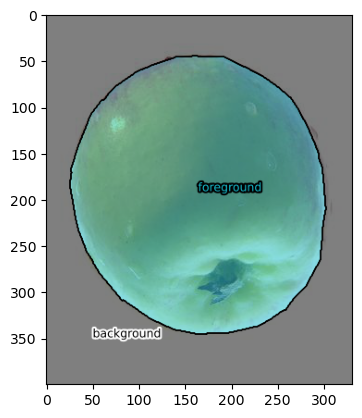

In [44]:
## Load a random image from the dataset and visualize it
image,label,info = dataset[np.random.randint(len(dataset))]
vis_image = jlc.mask_overlay_smooth(image,label,mask_alpha=0.5,
                                    class_names=info["idx_to_class"],
                                    show_border=True,
                                    fontsize_fixed_image_size=500,
                                    border_color="black")
plt.imshow(vis_image)
print(f"Loaded image from dataset {info['dataset_name']} with shape {image.shape} and labels {info['idx_to_class']}")

In [45]:

## Inspect the data structure with fancy jlc.shaprint 
# ("shape print") that recursively expands and prints
# nested structures, i.e. dicts, lists, tuples, etc. 
# containing more tuples or arrays or lists or dicts, etc.

jlc.shaprint(dataset[np.random.randint(len(dataset))],expand_deepest=1)

('np.Size([267, 400, 3])',
 'np.Size([267, 400])',
 {'class_counts': [62760, 44040],
  'classes': [0, 1],
  'dataset_name': 'duts',
  'fn': '<str>len84',
  'i': 6714,
  'idx_to_class': {0: 'background', 1: 'foreground'},
  'image_path': 'files/6714_im.jpg',
  'imshape': [267, 400, 3],
  'label_path': 'files/6714_la.png',
  'pretty': False,
  'split_idx': 0})


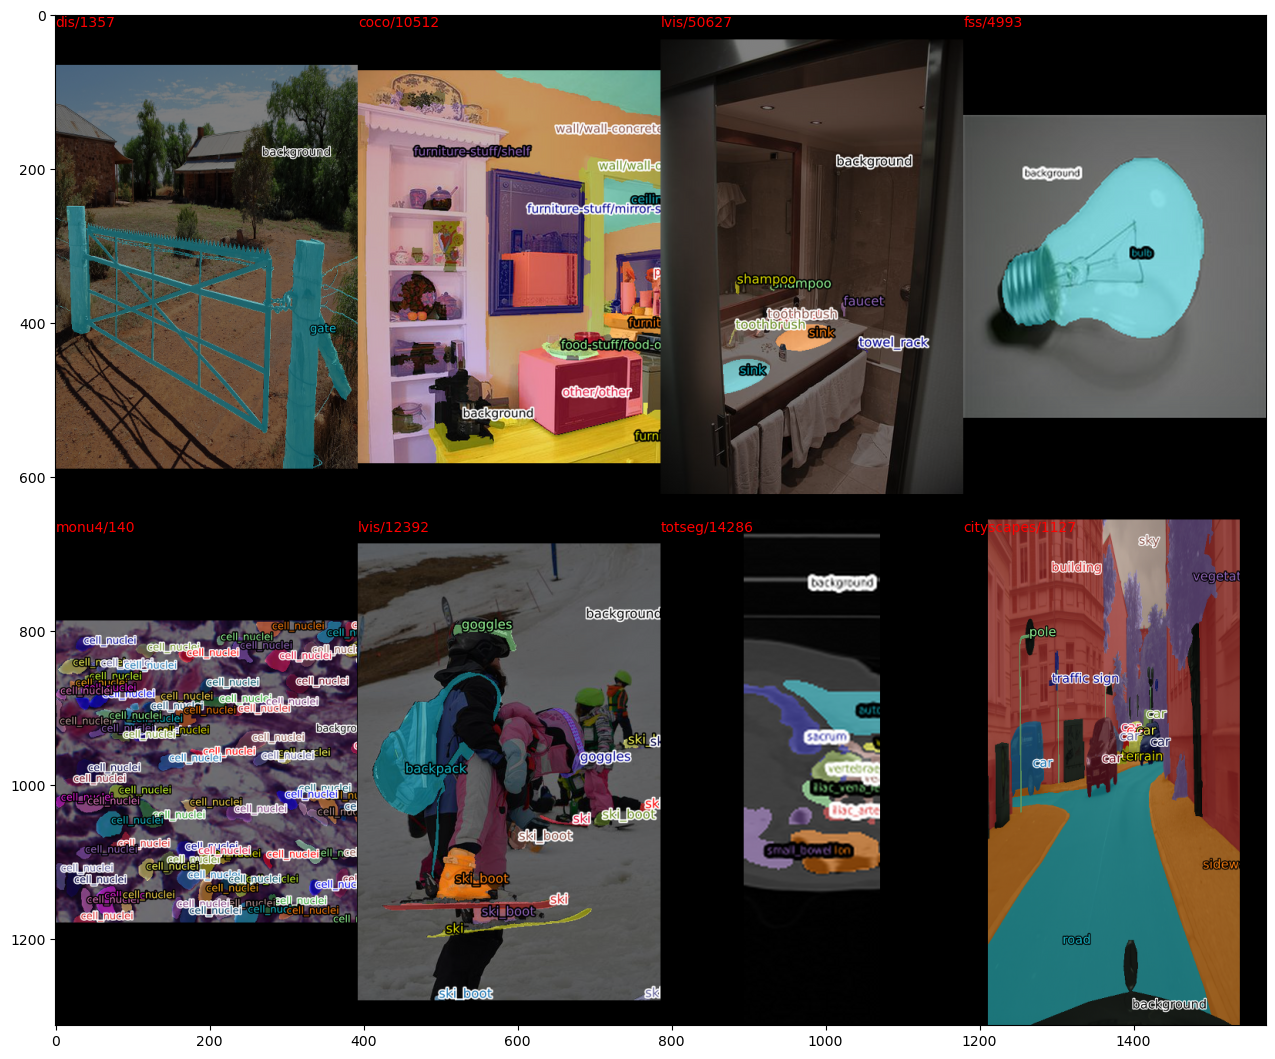

In [52]:
## Load a random batch and see what it looks like 
# with a fancy visualization function: jlc.montage

images,labels,infos = dataset.get_random_batch(downscale_num_pixels=5e5)
vis_images = []
for image,label,info in zip(images,labels,infos):
    

    vis_image = jlc.mask_overlay_smooth(image,label,mask_alpha=0.5,class_names = info["idx_to_class"],fontsize_fixed_image_size=500)
    vis_images.append(vis_image)
jlc.montage(vis_images,text=[f"{info['dataset_name']}/{info['i']}" for info in infos])

In [53]:
## This will maybe work: Show images with qt5 and use jlc.zoom()
# to allow matlab-like zooming, along with matlab-like panning (drag and drop)
%matplotlib qt5
jlc.montage(vis_images)
jlc.zoom()